# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 47 of Set 1 | wailua homesteads
Processing Record 48 of Set 1 | masbate
Processing Record 49 of Set 1 | steinbach
Processing Record 50 of Set 1 | manukan
Processing Record 0 of Set 2 | salinopolis
Processing Record 1 of Set 2 | darwin
Processing Record 2 of Set 2 | nar'yan-mar
Processing Record 3 of Set 2 | pisco
Processing Record 4 of Set 2 | valparaiso
Processing Record 5 of Set 2 | cidreira
Processing Record 6 of Set 2 | bilibino
Processing Record 7 of Set 2 | tolanaro
Processing Record 8 of Set 2 | rongelap
Processing Record 9 of Set 2 | iqaluit
Processing Record 10 of Set 2 | port mathurin
Processing Record 11 of Set 2 | stanley
Processing Record 12 of Set 2 | papatowai
Processing Record 13 of Set 2 | port augusta
Processing Record 14 of Set 2 | luderitz
Processing Record 15 of Set 2 | naze
Processing Record 16 of Set 2 | qaqortoq
Processing Record 17 of Set 2 | san antonio de pale
Processing Record 18 of Set 2 | taiohae
City not found. Skipping...
Processing Rec

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,10.55,73,92,3.73,CL,1699028743
1,eyl,7.9803,49.8164,27.27,79,84,6.95,SO,1699028743
2,waitangi,-43.9535,-176.5597,14.34,98,100,4.92,NZ,1699028743
3,chui,-33.6971,-53.4616,19.42,79,100,6.17,UY,1699028743
4,ribeira grande,38.5167,-28.7000,22.22,88,75,8.75,PT,1699028743


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,10.55,73,92,3.73,CL,1699028743
1,eyl,7.9803,49.8164,27.27,79,84,6.95,SO,1699028743
2,waitangi,-43.9535,-176.5597,14.34,98,100,4.92,NZ,1699028743
3,chui,-33.6971,-53.4616,19.42,79,100,6.17,UY,1699028743
4,ribeira grande,38.5167,-28.7000,22.22,88,75,8.75,PT,1699028743


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

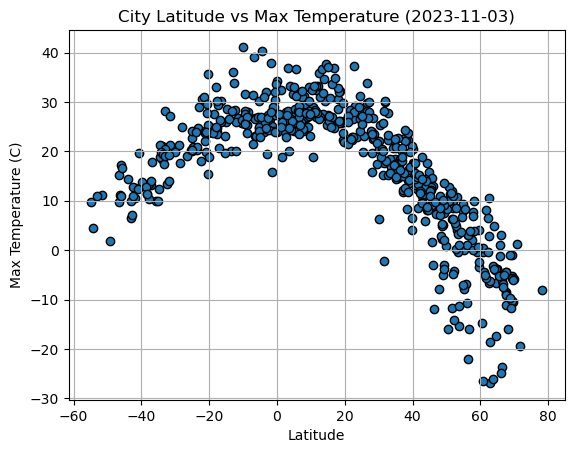

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

timestamp = city_data_df._get_value(0, "Date")
dt_object = str(datetime.fromtimestamp(timestamp))
date=dt_object[0:10]
plt.title(f'City Latitude vs Max Temperature ({date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

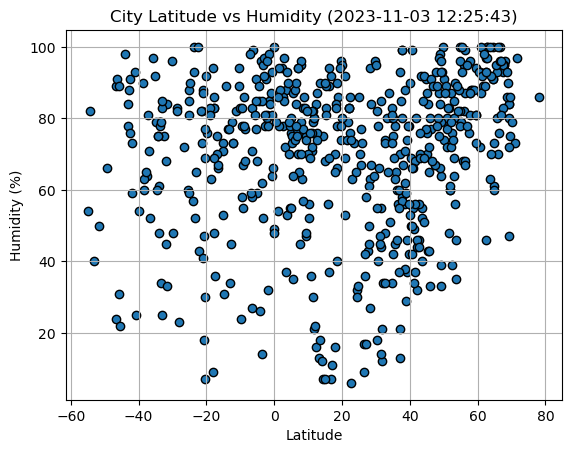

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

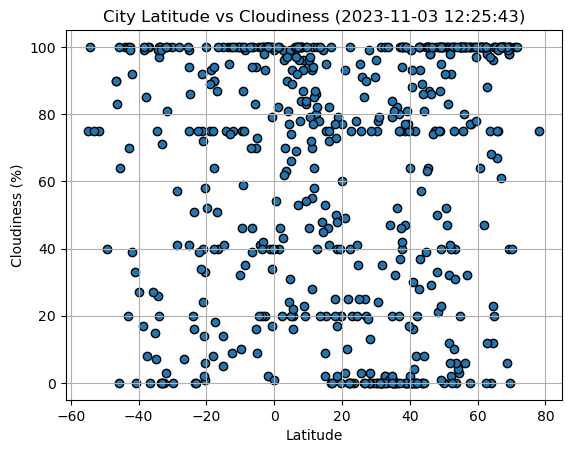

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({date})')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

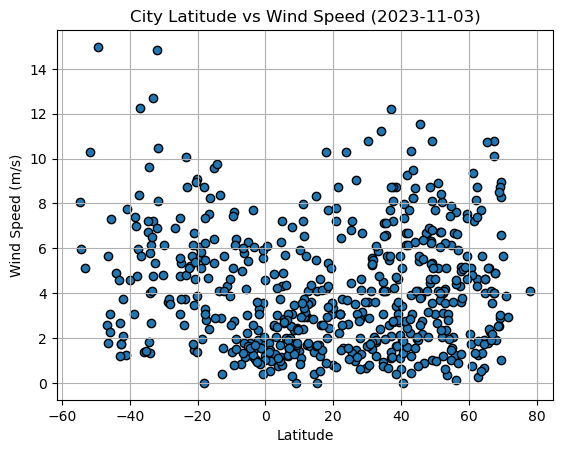

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs Wind Speed ({date})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,eyl,7.9803,49.8164,27.27,79,84,6.95,SO,1699028743
4,ribeira grande,38.5167,-28.7000,22.22,88,75,8.75,PT,1699028743
5,greenville,35.6127,-77.3663,14.52,45,0,4.12,US,1699028572
6,inirida,3.8653,-67.9239,33.23,53,90,0.76,CO,1699028744
8,dudinka,69.4058,86.1778,-10.21,80,100,8.94,RU,1699028744


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ancud,-41.8697,-73.8203,10.55,73,92,3.73,CL,1699028743
2,waitangi,-43.9535,-176.5597,14.34,98,100,4.92,NZ,1699028743
3,chui,-33.6971,-53.4616,19.42,79,100,6.17,UY,1699028743
7,port-aux-francais,-49.3500,70.2167,1.92,66,40,14.98,TF,1699028744
10,grytviken,-54.2811,-36.5092,4.43,82,100,5.97,GS,1699028744


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7727654699502248


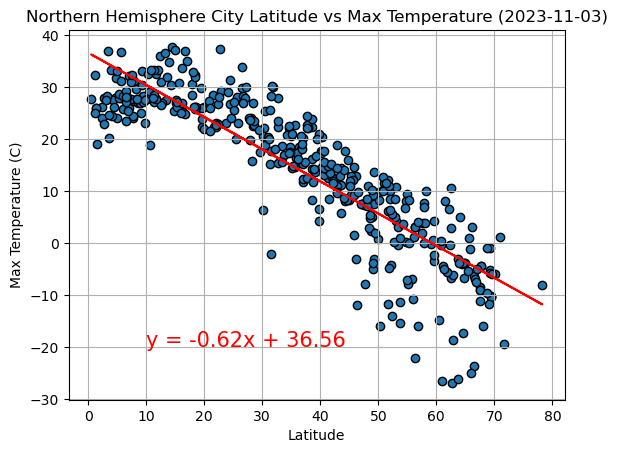

In [55]:
# Linear regression on Northern Hemisphere
x_axis=northern_hemi_df['Lat']
y_axis=northern_hemi_df['Max Temp']

plt.scatter(x_axis, y_axis, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = (x_axis) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10, -20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'Northern Hemisphere City Latitude vs Max Temperature ({date})')

plt.show()

The r-squared is: 0.6020108638835221


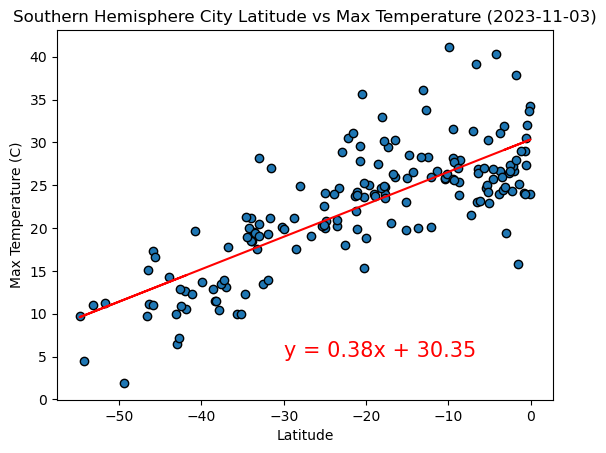

In [57]:
# Linear regression on Southern Hemisphere
x_axis=southern_hemi_df['Lat']
y_axis=southern_hemi_df['Max Temp']

plt.scatter(x_axis, y_axis, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = (x_axis) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30, 5),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'Southern Hemisphere City Latitude vs Max Temperature ({date})')

plt.show()

**Discussion about the linear relationship:

There is a strong negative correlation (0.77) between maximum temperature and latitude for northern hemisphere cities and a moderate positive correlation (0.60) between maximum temperature and latitude for southern hemisphere cities. THis trend makes esne as temperatures are higher toward the equater (lower latitudes) and lower towards the poles (higher latitudes).

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05473174200874987


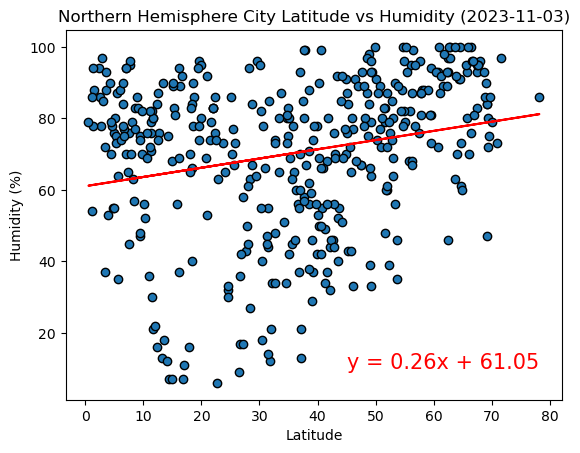

In [59]:
# Northern Hemisphere
x_axis=northern_hemi_df['Lat']
y_axis=northern_hemi_df['Humidity']

plt.scatter(x_axis, y_axis, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = (x_axis) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45, 10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere City Latitude vs Humidity ({date})')

plt.show()

The r-squared is: 0.015929773135154108


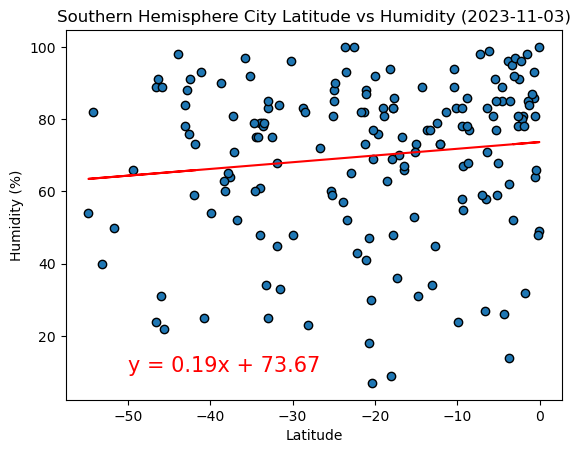

In [61]:
# Southern Hemisphere
x_axis=southern_hemi_df['Lat']
y_axis=southern_hemi_df['Humidity']

plt.scatter(x_axis, y_axis, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = (x_axis) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere City Latitude vs Humidity ({date})')

plt.show()

**Discussion about the linear relationship:** 

There is no correlation between latitude and humidty in either the northern (0.05) or southern (0.02) hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.011457472567791165


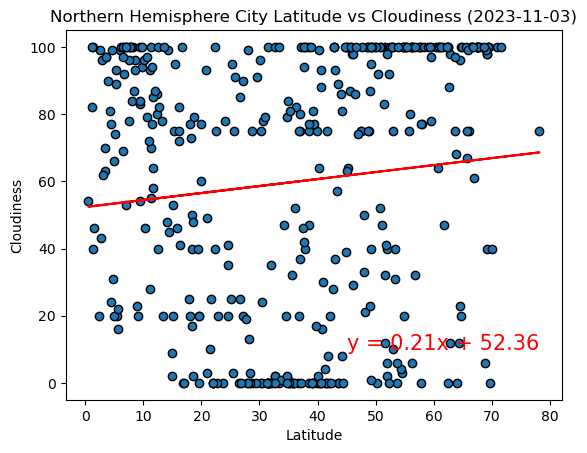

In [62]:
# Northern Hemisphere
x_axis=northern_hemi_df['Lat']
y_axis=northern_hemi_df['Cloudiness']

plt.scatter(x_axis, y_axis, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = (x_axis) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45, 10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere City Latitude vs Cloudiness ({date})')

plt.show()

The r-squared is: 0.0034633412525534603


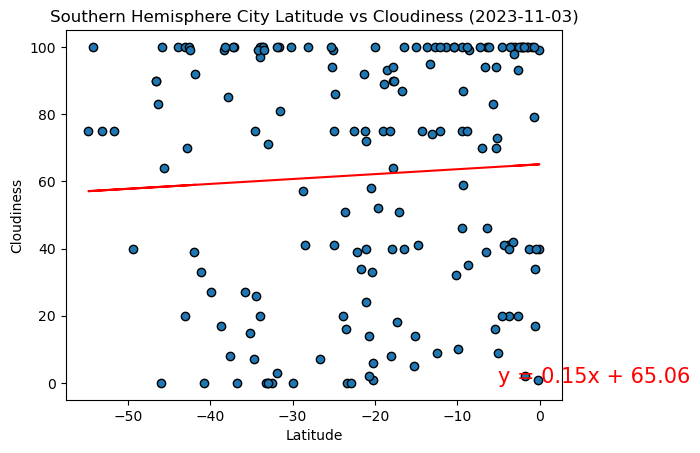

In [70]:
# Southern Hemisphere
x_axis=southern_hemi_df['Lat']
y_axis=southern_hemi_df['Cloudiness']

plt.scatter(x_axis, y_axis, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = (x_axis) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-5, 0),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere City Latitude vs Cloudiness ({date})')

plt.show()

**Discussion about the linear relationship: There is no correlation between latitude and cloudiness in either the northern (0.011) or southern (0.003) hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.05823058411465602


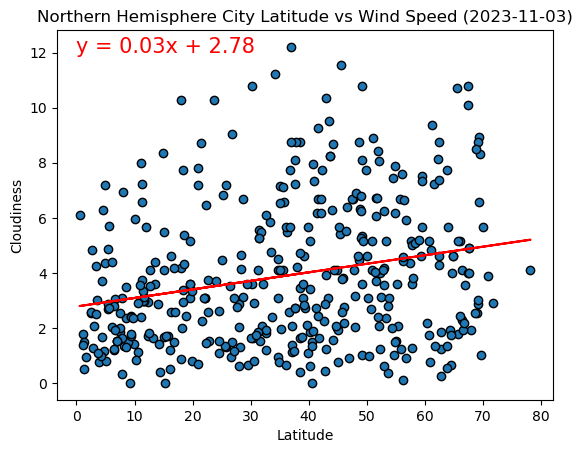

In [72]:
# Northern Hemisphere
x_axis=northern_hemi_df['Lat']
y_axis=northern_hemi_df['Wind Speed']

plt.scatter(x_axis, y_axis, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = (x_axis) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0, 12),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere City Latitude vs Wind Speed ({date})')

plt.show()

The r-squared is: 0.11455712241428971


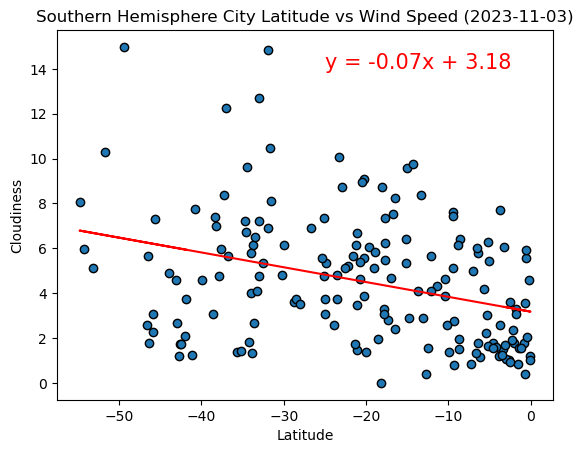

In [75]:
# Southern Hemisphere
x_axis=southern_hemi_df['Lat']
y_axis=southern_hemi_df['Wind Speed']

plt.scatter(x_axis, y_axis, edgecolors='black')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = (x_axis) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-25, 14),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere City Latitude vs Wind Speed ({date})')

plt.show()

**Discussion about the linear relationship:There is no correlation between latitude and cloudiness in either the northern (0.011) or southern (0.003) hemispheres.